In [1]:
import pandas as pd
from sklearn.decomposition import PCA
import glob
import re

In [2]:
all_dose_spectra = pd.DataFrame()
dose_classes = ["0 kGy", "2.5 kGy", "5 kGy", "10 kGy", "20 kGy", "50 kGy"]
wavenumber = pd.read_csv("./spectral_files/wave_no.csv")

indiv_dose_spectra_dirs = glob.glob("./spectral_files/*sn72.csv")
indiv_dose_spectra_dirs = sorted(indiv_dose_spectra_dirs,
                                 key=lambda x: float(re.search(r"(\d+\.\d+|\d+)kGy", x).group(1)))

kgy0, kgy2_5, kgy5, kgy10, kgy20, kgy50 = [pd.read_csv(df).T for df in indiv_dose_spectra_dirs]
all_dose_df = [kgy0, kgy2_5, kgy5, kgy10, kgy20, kgy50]

for df, dose_class in zip(all_dose_df, dose_classes):
    df['class'] = dose_class

master_data = pd.concat(all_dose_df, ignore_index=True)
wavenumber_extended = pd.concat([wavenumber['wave_no'], pd.Series(["class"])], ignore_index=True)

master_data.columns = wavenumber_extended

In [4]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D  # Required for 3D projection

def pca_my_ass():
    # Separate features (X) and labels (y)
    y = master_data.pop("class")
    X = master_data

    # Convert class labels to numerical values for coloring
    unique_classes = sorted(y.unique())  # Ensure consistent ordering
    color_map = {cls: i for i, cls in enumerate(unique_classes)}
    y_numeric = y.map(color_map)  # Convert class labels to numbers

    # Perform PCA
    X_reduced = PCA(n_components=3).fit_transform(X)

    # Create 3D scatter plot
    fig = plt.figure(figsize=(8, 6))
    ax = fig.add_subplot(111, projection="3d", elev=-150, azim=110)

    scatter = ax.scatter(
        X_reduced[:, 0],
        X_reduced[:, 1],
        X_reduced[:, 2],
        c=y_numeric,  # Use numerical labels for colors
        cmap="viridis",  # Adjust colormap if needed
        s=40,
    )

    # Set axis labels and title
    ax.set(
        title="First three PCA dimensions",
        xlabel="1st Eigenvector",
        ylabel="2nd Eigenvector",
        zlabel="3rd Eigenvector",
    )
    ax.xaxis.set_ticklabels([])
    ax.yaxis.set_ticklabels([])
    ax.zaxis.set_ticklabels([])

    # Create legend with correct class labels
    from matplotlib.lines import Line2D

    legend_elements = [
        Line2D([0], [0], marker="o", color="w", label=cls, markersize=6, markerfacecolor=scatter.to_rgba(i))
        for cls, i in color_map.items()
    ]
    ax.legend(handles=legend_elements, loc="upper right", title="Classes")

    plt.show()


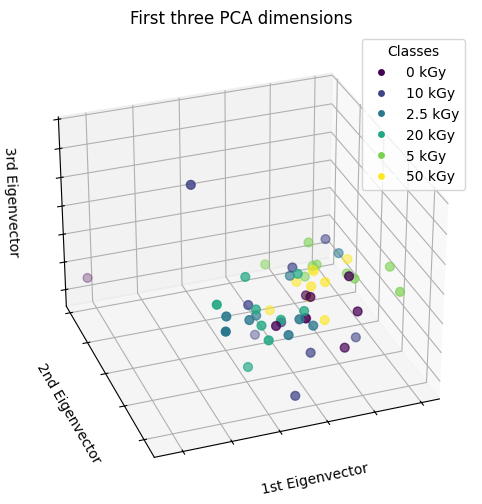

In [5]:
pca_my_ass()